In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 

In [52]:
df_train = pd.read_csv("C:\\Users\\Firdose Anjum\\OneDrive\\Desktop\\Tech skills\\ML Projects\\titanic survival\\train.csv")

In [53]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [55]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data cleaning and pre-processing

##### Handling missing values 

In [57]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since the column - Cabin has too many missing values, I have dropped the column. Other 2 columns missing values are replaced with median and mode. 

In [58]:
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)

In [59]:
df_train.drop(columns = ['Cabin'], inplace = True)

In [60]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

In [61]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### Dropping unnecessary columns

In [62]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [63]:
df_train.drop(columns=['PassengerId', 'Ticket', 'Name'], inplace=True)

In [64]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##### Encoding categorical values

In [65]:
df_train['Sex'] = df_train['Sex'].map({'male':0, 'female':1}) #Binary encoding
df_train = pd.get_dummies(df_train, columns = ['Embarked'], drop_first=True) #One hot encoding 

In [66]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


##### Feature Engineering

In [67]:
df_train['Family size'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train['Is alone'] = (df_train['Family size'] == 1).astype(int)

In [68]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family size,Is alone
0,0,3,0,22.0,1,0,7.2500,False,True,2,0
1,1,1,1,38.0,1,0,71.2833,False,False,2,0
2,1,3,1,26.0,0,0,7.9250,False,True,1,1
3,1,1,1,35.0,1,0,53.1000,False,True,2,0
4,0,3,0,35.0,0,0,8.0500,False,True,1,1


##### Feature scaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked_Q   891 non-null    bool   
 8   Embarked_S   891 non-null    bool   
 9   Family size  891 non-null    int64  
 10  Is alone     891 non-null    int32  
dtypes: bool(2), float64(2), int32(1), int64(6)
memory usage: 61.0 KB


In [71]:
scaler = StandardScaler()
numeric_features = ['Age', 'Fare', 'Family size']
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

In [72]:
X = df_train.drop(columns = ['Survived'])
Y = df_train['Survived']

In [73]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family size,Is alone
0,3,0,-0.565736,1,0,-0.502445,False,True,0.059160,0
1,1,1,0.663861,1,0,0.786845,False,False,0.059160,0
2,3,1,-0.258337,0,0,-0.488854,False,True,-0.560975,1
3,1,1,0.433312,1,0,0.420730,False,True,0.059160,0
4,3,0,0.433312,0,0,-0.486337,False,True,-0.560975,1


In [74]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### EDA

In [75]:
df = X.copy()
df['Survived'] = Y

In [76]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family size,Is alone,Survived
0,3,0,-0.565736,1,0,-0.502445,False,True,0.059160,0,0
1,1,1,0.663861,1,0,0.786845,False,False,0.059160,0,1
2,3,1,-0.258337,0,0,-0.488854,False,True,-0.560975,1,1
3,1,1,0.433312,1,0,0.420730,False,True,0.059160,0,1
4,3,0,0.433312,0,0,-0.486337,False,True,-0.560975,1,0


##### Survival by gender

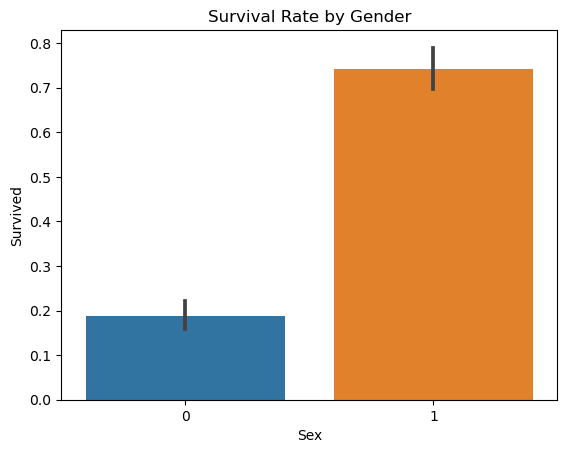

In [77]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender") 
plt.show()
# 0:male and 1:female 

##### Survival by passenger class

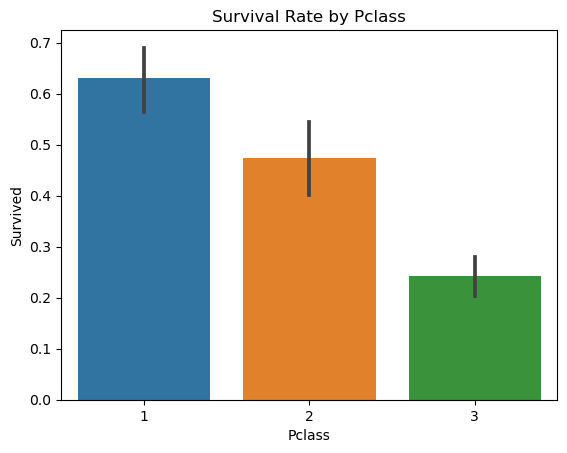

In [78]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Pclass")
plt.show()

##### Correlation with survival

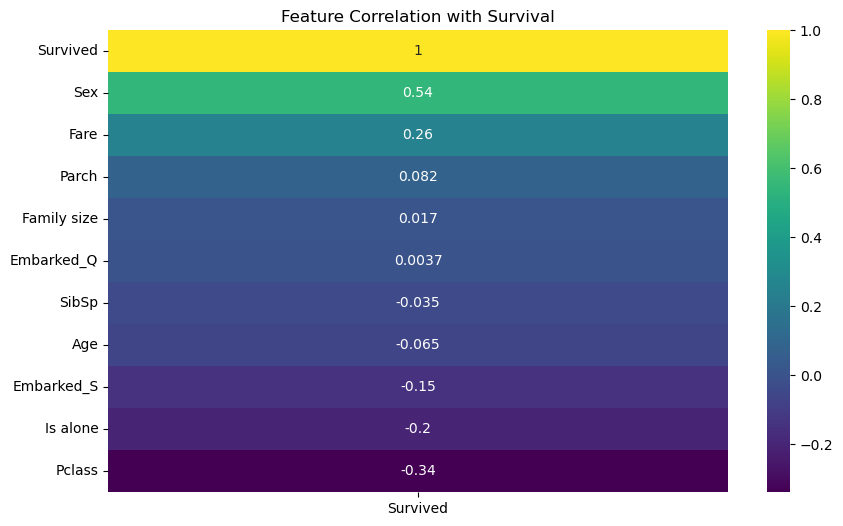

In [79]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr[['Survived']].sort_values(by='Survived', ascending=False), annot=True, cmap='viridis')
plt.title("Feature Correlation with Survival")
plt.show()

##### Numerical features v/s survival

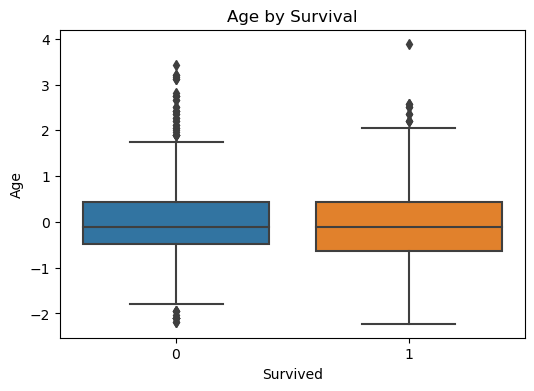

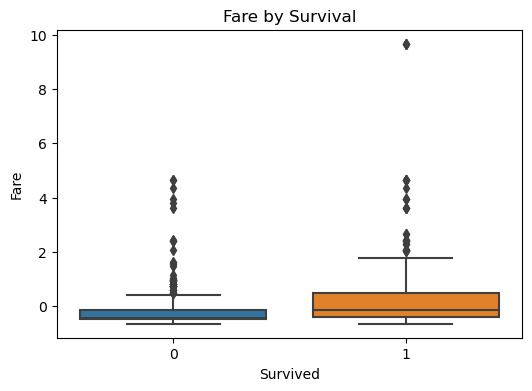

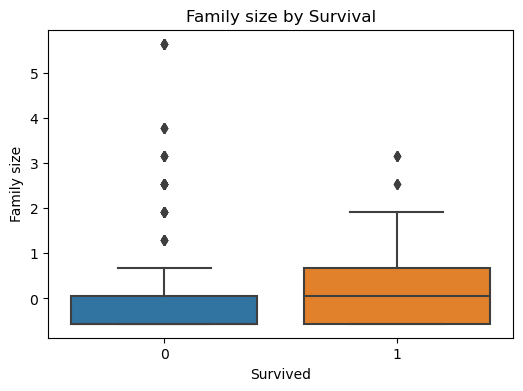

In [81]:
num_cols = ['Age', 'Fare', 'Family size']  # Add any numeric feature you created

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Survived', y=col, data=df)
    plt.title(f'{col} by Survival')
    plt.show()

#### should come back to these boxplots 

##### Alone v/s with family

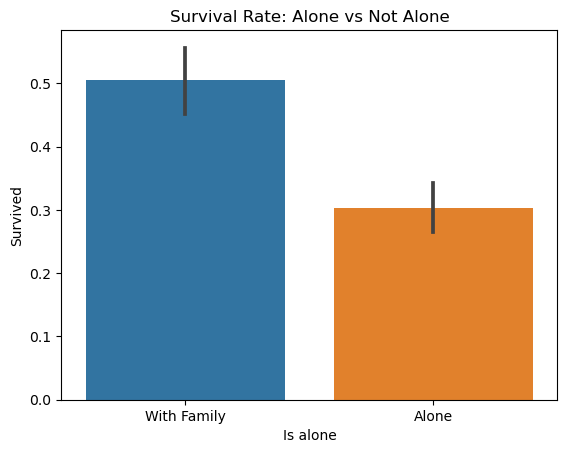

In [85]:
sns.barplot(x='Is alone', y='Survived', data=df)
plt.title("Survival Rate: Alone vs Not Alone")
plt.xticks([0,1], ['With Family', 'Alone'])
plt.show()

##### Embarked

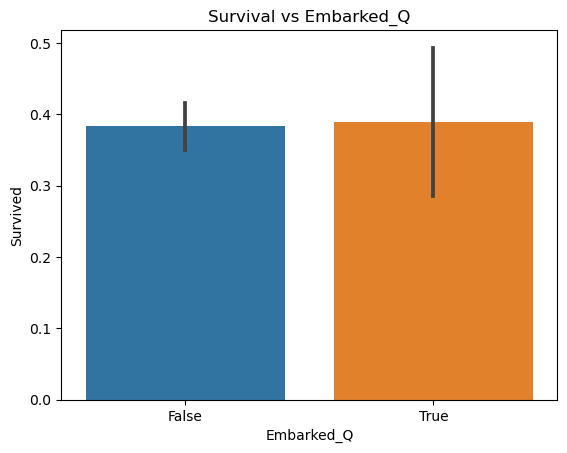

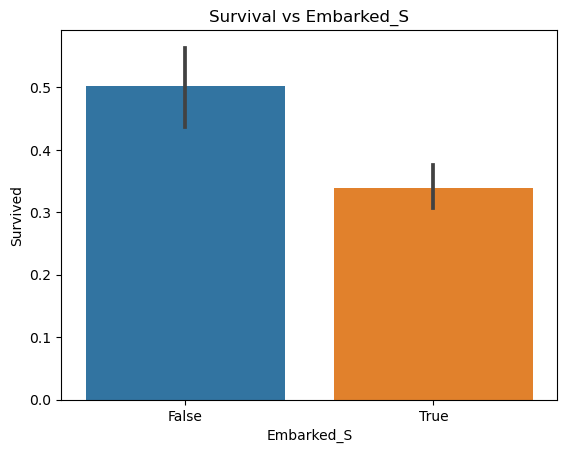

In [86]:
embarked_cols = [col for col in df.columns if 'Embarked' in col]

for col in embarked_cols:
    sns.barplot(x=col, y='Survived', data=df)
    plt.title(f'Survival vs {col}')
    plt.show()

C:\Users\Firdose Anjum\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Firdose Anjum\AppData\Local\Temp\ipykernel_26008\3327252883.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


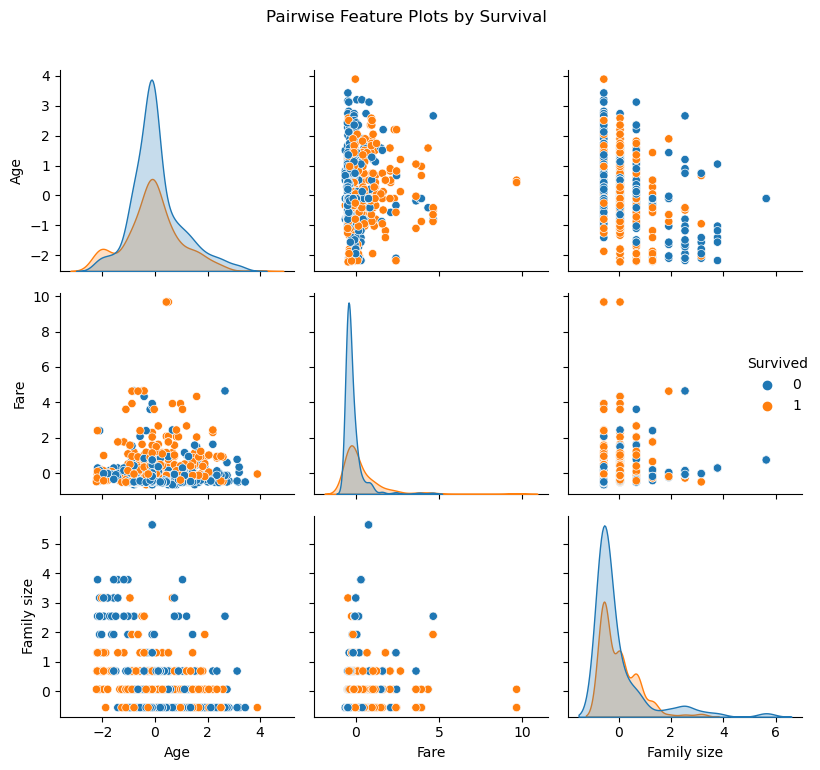

In [89]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Family size']], hue='Survived')
plt.suptitle("Pairwise Feature Plots by Survival", y=1.02)
plt.tight_layout()
plt.show()

### Model Building

In [90]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family size,Is alone
0,3,0,-0.565736,1,0,-0.502445,False,True,0.059160,0
1,1,1,0.663861,1,0,0.786845,False,False,0.059160,0
2,3,1,-0.258337,0,0,-0.488854,False,True,-0.560975,1
3,1,1,0.433312,1,0,0.420730,False,True,0.059160,0
4,3,0,0.433312,0,0,-0.486337,False,True,-0.560975,1


In [91]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### Test train split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state=42, stratify = Y)

###### stratify=y keeps the survival class ratio balanced in both sets. 

#### Training a model

### 1. Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

#### Model evaluation

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(x_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Accuracy: 0.8044692737430168
Precision: 0.7833333333333333
Recall: 0.6811594202898551
F1 Score: 0.7286821705426356


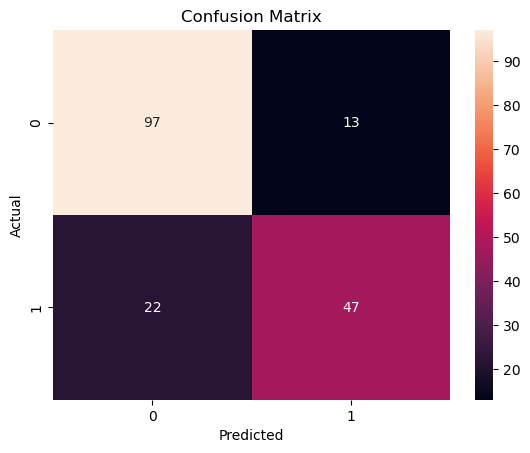

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##### Using weights, how each feature helps can be understood

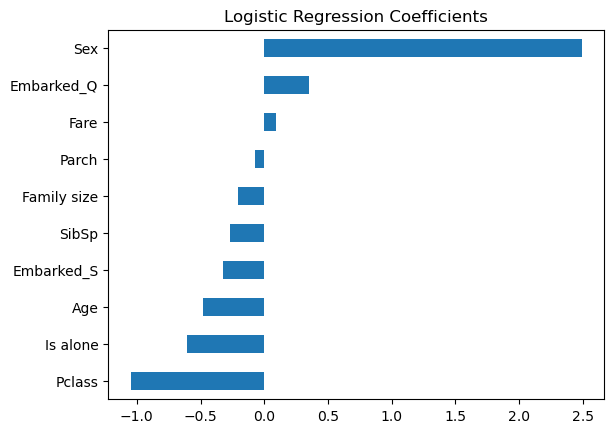

In [100]:
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh')
plt.title("Logistic Regression Coefficients")
plt.show()

### 2. RandomForestClassifier 

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

rf_preds = rf_model.predict(x_val)

print("Random Forest Classifier:")
print(confusion_matrix(y_val, rf_preds))
print(classification_report(y_val, rf_preds))

Random Forest Classifier:
[[97 13]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



### 3. XGBoost

In [104]:
pip install xgboost

In [105]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)

xgb_preds = xgb_model.predict(x_val)

print("XGBoost Classifier:")
print(confusion_matrix(y_val, xgb_preds))
print(classification_report(y_val, xgb_preds))

XGBoost Classifier:
[[94 16]
 [18 51]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



C:\Users\Firdose Anjum\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:47:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [107]:
models = {
    'Logistic Regression': model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    preds = model.predict(x_val)
    acc = accuracy_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    print(f"{name} → Accuracy: {acc:.4f}, F1-Score: {f1:.4f}")

Logistic Regression → Accuracy: 0.8045, F1-Score: 0.7287
Random Forest → Accuracy: 0.8268, F1-Score: 0.7669
XGBoost → Accuracy: 0.8101, F1-Score: 0.7500


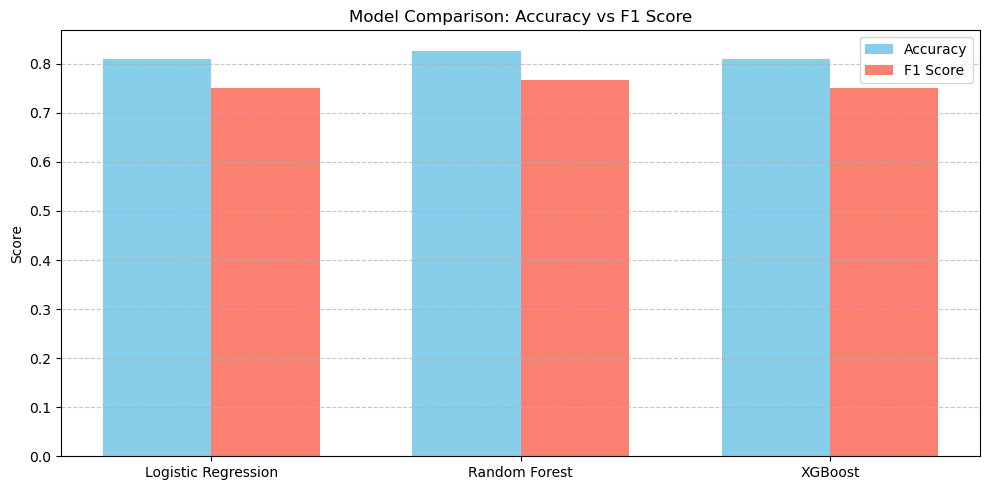

In [109]:
models = {
    'Logistic Regression': model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

accuracies = []
f1_scores = []
names = []

for name, model in models.items():
    preds = model.predict(x_val)
    acc = accuracy_score(y_val, preds)
    f1 = f1_score(y_val, preds)
    accuracies.append(acc)
    f1_scores.append(f1)
    names.append(name)

x = range(len(names))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar([i - width/2 for i in x], accuracies, width=width, label='Accuracy', color='skyblue')
plt.bar([i + width/2 for i in x], f1_scores, width=width, label='F1 Score', color='salmon')

plt.xticks(x, names)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs F1 Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Since Random Forest is working the best so far, let's do hyperparameter tuning on it.

### GridSearchCV

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1',
    verbose=1
)

grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_

best_preds = best_rf.predict(x_val)
print("Best Random Forest after GridSearch:")
print(confusion_matrix(y_val, best_preds))
print(classification_report(y_val, best_preds))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Random Forest after GridSearch:
[[98 12]
 [23 46]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



#### Testing the tuned Randomforest model

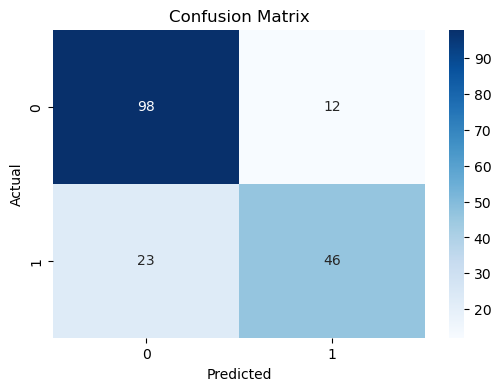

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       110
           1       0.79      0.67      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

ROC AUC Score: 0.8389986824769434


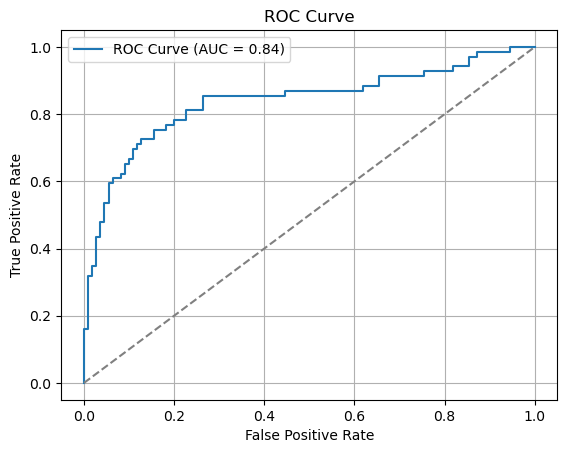

In [111]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred = best_rf.predict(x_val)
y_proba = best_rf.predict_proba(x_val)[:, 1]

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Classification Report:\n", classification_report(y_val, y_pred))

roc_auc = roc_auc_score(y_val, y_proba)
print("ROC AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

#### Feature Importance Visualisation

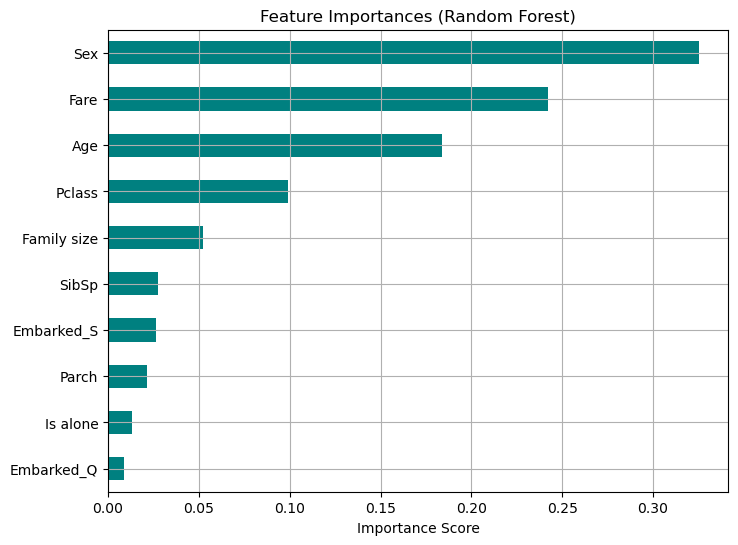

In [112]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6), color='teal')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()